<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE 20255 Introduction to Chemical Engineering Analysis](http://jckantor.github.io/CBE20255/) 
by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE20255).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Vapor-Liquid Equilibrium for Pure Components](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.02-Vapor-Liquid-Equilibrium-for-Pure-Components.ipynb) | [Contents](toc.ipynb) | [Raoult Law for Ideal Mixtures](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.04-Raoult-Law-for-Ideal-Mixtures.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.03-Operating-Limits-for-a-Methanol-Lighter.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Operating Limits for a Methanol Lighter

## Summary
Demonstrates the use Antoine's equation and Raoult's law to compute flammability limits for methanol.

## Problem

We'd like to estimate range of temperatures over which this methanol fueled fire starter will successfully operate.

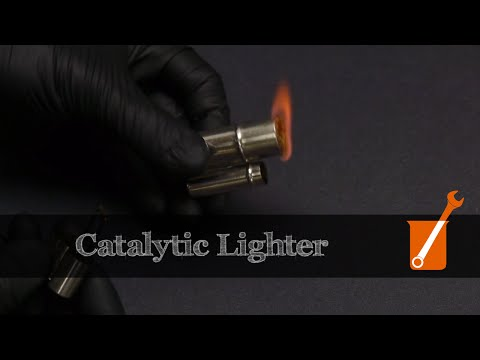

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("8gFqzbnUO-Y")

The flammability limits of methanol in air at 1 atmosphere pressure correspond to vapor phase mole fractions in the range

$$ 6.7 \mbox{ mol%} \leq y_{MeOH} \leq 36 \mbox{ mol%} $$

Assuming the pure methanol located in the wick of this fire starter reaches a vapor-liquid with air in the device, find the lower and upper operating temperatures for this device.

## Antoine's Equation for the Saturation Pressure of Methanol

The first thing we'll do is define a simple python function to calculate the saturation pressure of methanol at a given temperature using Antoine's equation

$$\log_{10} P^{sat} = A - \frac{B}{T + C}$$

Constants for methanol can be found in the back of the course textbook for the case where pressure is given in units of mmHg and temperature in degrees centigrade.

In [ ]:
# Antoine equation for methanol. Pressure in mmHg, temperature in degrees C
A = 7.89750
B = 1474.08
C = 229.13

def Psat(T):
    return 10**(A - B/(T+C))

To test the function, compute the saturation pressure of methanol for several temperatures and print the results.

In [3]:
T = [0, 5, 10, 15, 20, 25]

for t in T:
  print('Saturation pressure of methanol at', t, 'deg C =', Psat(t), 'mmHg')

Saturation pressure of methanol at 0 deg C = 29.11532005615582 mmHg
Saturation pressure of methanol at 5 deg C = 39.94943048219959 mmHg
Saturation pressure of methanol at 10 deg C = 54.09464146182495 mmHg
Saturation pressure of methanol at 15 deg C = 72.3445037835956 mmHg
Saturation pressure of methanol at 20 deg C = 95.6288978068613 mmHg
Saturation pressure of methanol at 25 deg C = 125.02710947768249 mmHg


## Equilibrium Vapor Composition at Room Temperature

By Raoult's law, the partial pressure of pure methanol is equal to the saturation pressure,

\begin{equation}
p_{MeOH} = P^{sat}_{MeOH}(T)
\end{equation}

For an ideal gas, the partial pressure is given by Dalton's law

\begin{equation}
p_{MeOH} = y_{MeOH} P
\end{equation}

Putting these together and solving for the mole fraction of methanol in the vapor phase

\begin{equation}
y_{MeOH} = \frac{P^{sat}_{MeOH}(T)}{P}
\end{equation}


For example, at an atmospheric pressure of 760 mmHg, the mole fraction of methanol is given by

In [4]:
P = 760.0             # mmHg
y = Psat(25)/P        # mole fraction

print("mole fraction of methanol at 25 deg C and 1 atmosphere =", y)

mole fraction of methanol at 25 deg C and 1 atmosphere = 0.16450935457589802


Since this is within the flammability limits of methanol, the fire starter should work at room temperatures.

## Lower Operating Temperature Limit

The partial pressure of methanol at the lower flammability limit

\begin{equation}
p_{MeOH} = y_{MeOH}P
\end{equation}

In [5]:
P = 760.0           # pressure mmHg
y = 0.067           # mole fractio at the lower flammability limit

p_MeOH = 0.067*760
print('model fraction at the LFL =', p_MeOH, "mm Hg")

model fraction at the LFL = 50.92 mm Hg


Next we need to solve for the temperature at which the partial pressure of methanol is at the lower flammability limit.

\begin{equation}
P^{sat}_{MeOH}(T) = p_{MeOH}
\end{equation}

Let's start with a guesses at 0 and 20 deg C.

In [6]:
print(Psat(0), "mmHg")
print(Psat(20), "mmHg")

29.11532005615582 mmHg
95.6288978068613 mmHg


This may be close enough to use an equation solver to finish the job. Here we'll use [`brentq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) which is one of the [root-finding funtions](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)  from the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) library. 

A python [`lambda`](https://www.w3schools.com/python/python_lambda.asp) function is a convenient means of recasting the equation

\begin{equation}
P^{sat}_{MeOH} = y_{MeOH}P
\end{equation}

as

\begin{equation}
P^{sat}_{MeOH} - y_{MeOH}P = 0
\end{equation}

which is the form need for using a root-finding algorithm.

In [7]:
# problem data
P = 760.0           # pressure mmHg
y = 0.067           # mole fractio at the lower flammability limit

# partial pressure of methanol at the lower flamability limit
p_MeOH = 0.067*760

# Antoine equation for methanol. Pressure in mmHg, temperature in degrees C
def Psat(T):
    return 10**(7.89750 - 1474.08/(T + 229.13))

from scipy.optimize import brentq

Tlow = brentq(lambda T: Psat(T) - p_MeOH, 0, 20)
print("Lower Flammability Temperature = ", Tlow, "deg C")
print("Upper Flammability Temperature = ", 32.0 + 9.0*Tlow/5.0, "deg F")

Lower Flammability Temperature =  8.985406691811518 deg C
Upper Flammability Temperature =  48.173732045260735 deg F


## Exercise

Calculate the upper limit on temperature at which this lighter can operate.

<!--NAVIGATION-->
< [Vapor-Liquid Equilibrium for Pure Components](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.02-Vapor-Liquid-Equilibrium-for-Pure-Components.ipynb) | [Contents](toc.ipynb) | [Raoult Law for Ideal Mixtures](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.04-Raoult-Law-for-Ideal-Mixtures.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.03-Operating-Limits-for-a-Methanol-Lighter.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>